In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split#集成的划分训练集模型
from sklearn.naive_bayes import GaussianNB#高斯贝叶斯分类器
from sklearn.model_selection import cross_val_score#k折交叉验证
from sklearn.preprocessing import StandardScaler
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#读取excel
AF_input_frame=pd.read_excel('pre_treatment_data.xlsx',sheet_name='AF_input')
nonAF_input_frame=pd.read_excel('pre_treatment_data.xlsx',sheet_name='nonAF_input')
AF_label_frame=pd.read_excel('pre_treatment_data.xlsx',sheet_name='AF_label')
nonAF_label_frame=pd.read_excel('pre_treatment_data.xlsx',sheet_name='nonAF_label')

#将data_frame转化为numpy的ndarry的格式
AF_input=AF_input_frame.to_numpy()
nonAF_input=nonAF_input_frame.to_numpy()
AF_label=AF_label_frame.to_numpy()
nonAF_label=nonAF_label_frame.to_numpy()

AF_label=AF_label.flatten()#二维转一维，所有值在一维里
nonAF_label=nonAF_label.flatten()

In [13]:
raw_x=np.concatenate([AF_input,nonAF_input])#数据集x
raw_y=np.concatenate([AF_label[0:],nonAF_label[0:]])#标签y
print(raw_x,raw_y)
raw_x[0]

[[ 199.06666667   45.50159948  133.         ...  193.5
  2070.39555556   10.47337202]
 [ 207.83333333   44.46727886  137.         ...  212.
  1977.33888889   10.42738429]
 [ 210.06666667   61.78237793  127.         ...  192.
  3817.06222222   11.08511342]
 ...
 [ 308.73333333   46.82800681  161.         ...  294.5
  2192.86222222   10.53083999]
 [ 237.8          33.21184528  157.         ...  236.
  1103.02666667    9.84369026]
 [ 241.53333333   29.57108197  118.         ...  248.5
   874.44888889    9.61147091]] [1 1 1 ... 0 0 0]


array([ 199.06666667,   45.50159948,  133.        ,  281.        ,
        148.        ,  193.5       , 2070.39555556,   10.47337202])

In [17]:
#将八个属性的每个属性单独拿出来，算出各自的正确率。
#均值,标准差,最小值,最大值,范围,中值,方差,熵
raw_x1=raw_x[:,[0,1]]
raw_x1[:,[1]]=0
for i in range(8):
    raw_x1[:,[0]]=raw_x[:,[i]]
    acc_list=[]
    k=10#十折交叉
    model=GaussianNB()
    acc=cross_val_score(model,raw_x1,raw_y,cv=k,scoring='accuracy')
    mean_acc=np.array(acc).mean()
    print(str(i),mean_acc)

0 0.7122776679841897
1 0.7861166007905138
2 0.7913043478260869
3 0.5652420948616601
4 0.7318181818181818
5 0.7177124505928855
6 0.4579051383399209
7 0.791205533596838


In [5]:
#10折交叉验证

acc_list=[]

##ss=StandardScaler() #不需要归一化，归一化前后概率相同
##raw_x=ss.fit_transform(raw_x)

k=10#十折交叉
model=GaussianNB()
acc=cross_val_score(model,raw_x,raw_y,cv=k,scoring='accuracy')
mean_acc=np.array(acc).mean()
print(mean_acc)

0.8096096837944664


In [8]:
raw_x1=raw_x[:,[0,1,5]]#选取均值，标准差，中位数三个特征属性放入贝叶斯分类器中训练
print(raw_x1)

[[199.06666667  45.50159948 193.5       ]
 [207.83333333  44.46727886 212.        ]
 [210.06666667  61.78237793 192.        ]
 ...
 [308.73333333  46.82800681 294.5       ]
 [237.8         33.21184528 236.        ]
 [241.53333333  29.57108197 248.5       ]]


In [9]:
#选取均值，标准差，中位数三个特征属性放入贝叶斯分类器中训练,得到最佳准确率。
raw_x1=raw_x[:,[0,1,5]]#选取均值，标准差，中位数三个特征属性放入贝叶斯分类器中训练
acc_list=[]
k=10#十折交叉
model=GaussianNB()
acc=cross_val_score(model,raw_x1,raw_y,cv=k,scoring='accuracy')
mean_acc=np.array(acc).mean()
print(mean_acc)

0.8355237154150197


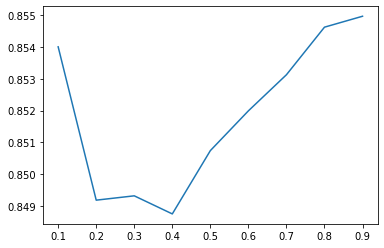

In [69]:
#留出法的影响不大，可删除
index=[]#每次测试集的划分比例
acc=[]
for i in range(1,10):
    index.append(0.1*i)
    x_train,x_test,y_train,y_test=train_test_split(raw_x,raw_y,test_size=0.1*i,random_state=0)
#创建BYS模型
    model=GaussianNB()
    model.fit(x_train,y_train)#模型训练
    y_pred=model.predict(x_test)#预测测试集
    acc.append(Counter(y_pred==y_test)[True]/x_test.shape[0])
plt.plot(index,acc)